In [1]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Get the stock quote 
df = web.DataReader('^JKSE', data_source='yahoo', start='2005-01-01', end='2020-06-01') 
#Show the data 
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2005-01-03,1002.372009,994.531006,1000.554016,1000.877014,4584400.0,1000.847290
2005-01-04,1019.070984,1002.271973,1002.271973,1018.543030,16504000.0,1018.512756
2005-01-05,1025.383057,1013.366028,1016.406006,1015.431030,22712700.0,1015.400879
2005-01-06,1029.885986,1014.866028,1014.866028,1029.885986,20900900.0,1029.855347
2005-01-07,1038.823975,1028.343994,1034.302979,1032.525024,23479000.0,1032.494385
...,...,...,...,...,...,...
2020-05-20,4561.554199,4521.470215,4548.655762,4545.952148,42464800.0,4545.952148
2020-05-26,4634.652832,4541.833984,4545.952148,4626.798828,53757500.0,4626.798828
2020-05-27,4641.555176,4597.372070,4626.798828,4641.555176,60985400.0,4641.555176


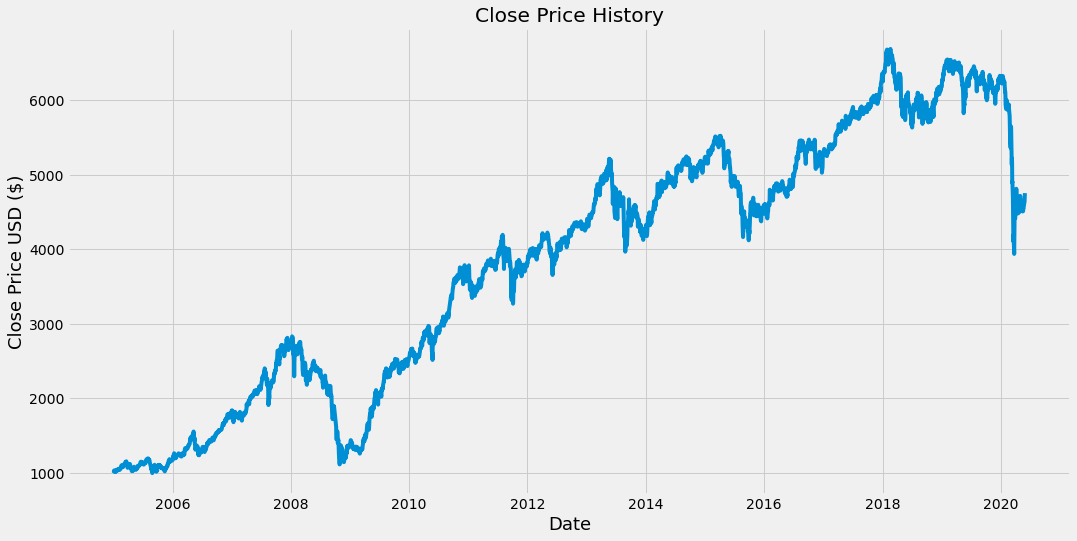

In [3]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [4]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])#Converting the dataframe to a numpy array
dataset = data.values#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) 

In [5]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [6]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(50,len(train_data)):
    x_train.append(train_data[i-50:i,0])
    y_train.append(train_data[i,0])

In [7]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [8]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [9]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [10]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [11]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
93/93 [==============================] - 5s 56ms/step - loss: 0.0116
Epoch 2/50
93/93 [==============================] - 5s 58ms/step - loss: 2.7829e-04
Epoch 3/50
93/93 [==============================] - 6s 67ms/step - loss: 2.6807e-04
Epoch 4/50
93/93 [==============================] - 6s 61ms/step - loss: 2.6851e-04
Epoch 5/50
93/93 [==============================] - 6s 60ms/step - loss: 2.5916e-04
Epoch 6/50
93/93 [==============================] - 6s 65ms/step - loss: 2.5450e-04
Epoch 7/50
93/93 [==============================] - 6s 68ms/step - loss: 2.4510e-04: 0s - lo
Epoch 8/50
93/93 [==============================] - 6s 62ms/step - loss: 2.4502e-04
Epoch 9/50
93/93 [==============================] - 6s 65ms/step - loss: 2.3800e-04
Epoch 10/50
93/93 [==============================] - 6s 63ms/step - loss: 2.2792e-04
Epoch 11/50
93/93 [==============================] - 6s 65ms/step - loss: 2.2179e-04
Epoch 12/50
93/93 [==============================] - 6s 69ms/step - l

In [13]:
#Test data set
test_data = scaled_data[training_data_len - 50: , : ]#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(50,len(test_data)):
    x_test.append(test_data[i-50:i,0])

In [14]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [15]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [16]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [17]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

61.28897926565645

<ipython-input-18-3f7d6069136f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions#Visualize the data


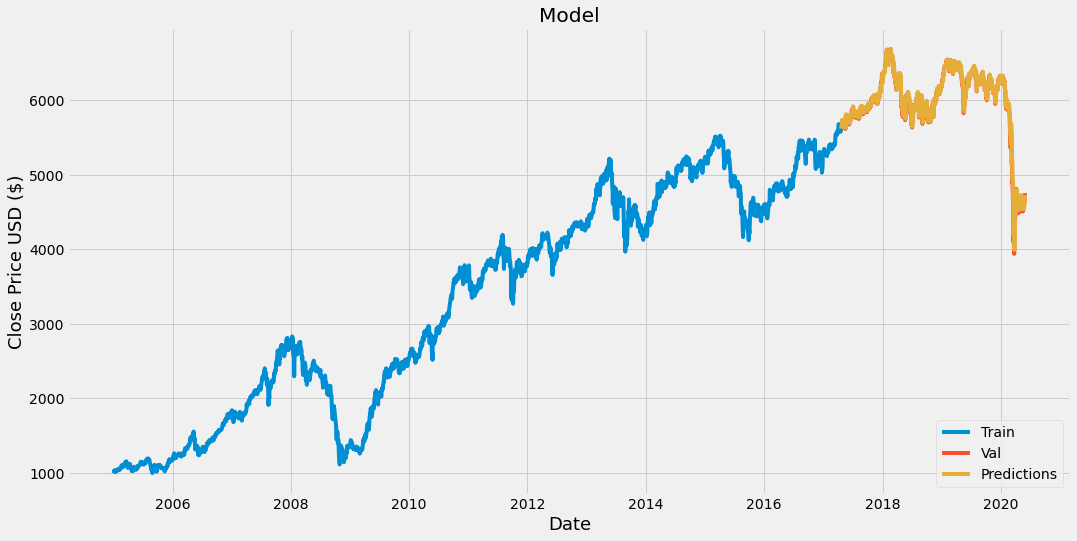

In [18]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [19]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2017-04-21,5664.475098,5617.727539
2017-04-25,5680.795898,5683.358887
2017-04-26,5726.529785,5698.451660
2017-04-27,5707.027832,5737.330566
2017-04-28,5685.297852,5715.011719
...,...,...
2020-05-20,4545.952148,4575.812012
2020-05-26,4626.798828,4576.424316
2020-05-27,4641.555176,4643.855957


In [20]:
#Get the quote
apple_quote = web.DataReader('^JKSE', data_source='yahoo', start='2005-01-01', end='2020-12-15') 
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price 
last_50_days = new_df[-50:].values
#Scale the data to be values between 0 and 1
last_50_days_scaled = scaler.transform(last_50_days)
#Create an empty list
X_test = []#Append teh past 50 days
X_test.append(last_50_days_scaled)#Convert the X_test data set to a numpy array
X_test = np.array(X_test)#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))#Get the predicted scaled price
pred_price = model.predict(X_test)#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[6018.136]]


In [21]:
#Get the quote
JKSE = web.DataReader('^JKSE', data_source='yahoo', start='2020-12-17', end='2020-12-17')
print(JKSE['Close'])

Date
2020-12-17    6136.530762
Name: Close, dtype: float64
